# Script de modélisation

## Prise en compte des données

In [1]:
import pandas as pd
import numpy as np
import panel as pn

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('result_requetes.csv')
#data.head()

In [ ]:
#len(data)

In [ ]:
#data.dtypes

In [2]:
#On affecte le bon type aux variables qualitatives
data["city"]=pd.Categorical(data["city"],ordered=False)
data["language"]=pd.Categorical(data["language"],ordered=False)
data["group"]=pd.Categorical(data["group"],ordered=False)
data["brand"]=pd.Categorical(data["brand"],ordered=False)

data["mobile"]=pd.Categorical(data["mobile"],ordered=False)
data["parking"]=pd.Categorical(data["parking"],ordered=False)
data["pool"]=pd.Categorical(data["pool"],ordered=False)
data["children_policy"]=pd.Categorical(data["children_policy"],ordered=False)

data["hotel_id"]=pd.Categorical(data["hotel_id"],ordered=False)
data["avatar_id"]=pd.Categorical(data["avatar_id"],ordered=False)

data["price"]=pd.DataFrame(data["price"], dtype=float)

#data.dtypes
#data.head()

## Analyse de données

In [ ]:
data.describe() #Indicateurs statistiques 1D pour les variables quantitatives

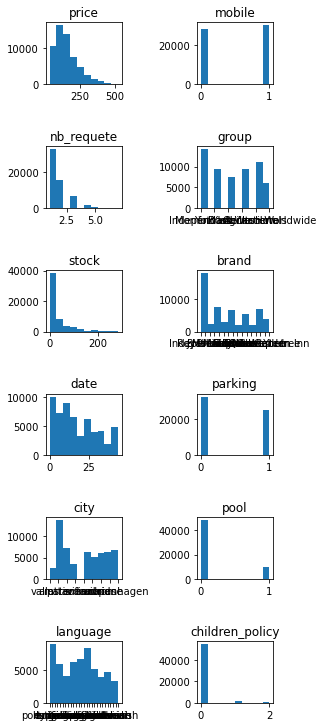

In [12]:
# Tracé des histogrammes
cm = 1/2.54
fig, ax = plt.subplots(6,2,figsize=(10*cm, 30*cm))
ax[0,0].hist(data["price"])
ax[0,0].set_title('price')
ax[1,0].hist(data["nb_requete"])
ax[1,0].set_title('nb_requete')
ax[2,0].hist(data["stock"])
ax[2,0].set_title('stock')
ax[3,0].hist(data["date"])
ax[3,0].set_title('date')
ax[4,0].hist(data["city"])
ax[4,0].set_title('city')
ax[5,0].hist(data["language"])
ax[5,0].set_title('language')
ax[0,1].hist(data["mobile"])
ax[0,1].set_title('mobile')
ax[1,1].hist(data["group"])
ax[1,1].set_title('group')
ax[2,1].hist(data["brand"])
ax[2,1].set_title('brand')
ax[3,1].hist(data["parking"])
ax[3,1].set_title('parking')
ax[4,1].hist(data["pool"])
ax[4,1].set_title('pool')
ax[5,1].hist(data["children_policy"])
ax[5,1].set_title('children_policy')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)
plt.show()

In [ ]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
scatter_matrix(data[["price","stock","date","nb_requete"]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

### Observations :

Ligne 1 :

prix en fonction du stock : prix + élevé quand stock tout petit. Passé un stock de 50 chambres dispo, peu de variation du prix. corrélation = 0.2 environ

prix en fonction de la date : prix + élevé quand date + petite. Passé 20 jours, peu de variation du prix. corrélation = -0.2 environ

prix en fonction du nb de requetes : prix + élevé quand nb de requetes + élevé. corrélation = 0.2 environ

Ligne 2 :

stock en fonction de la date : stock augmente avec la date. corrélation = 0.8 environ

In [ ]:
correlation_mat = data[["price","stock","date","nb_requete"]].corr()

import seaborn as sns
sns.heatmap(correlation_mat, annot = False)

plt.show()

### Analyse à ajouter pour déterminer les features les + importantes, etc...

Analyse factorielle discriminante ?

## Extraction des échantillons d'apprentissage et de validation

In [ ]:
data.head()

### Xtrain avec conversion des variables catégorielles en dummy/indicator variables

Utilisation de OneHotEncoder au lieu de pd.get_dummies

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()  
#scaler.fit(X_train)  
#Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
#Xr_val = scaler.transform(X_val)

In [3]:
from sklearn.preprocessing import OneHotEncoder
#X=data[["city","language","mobile","hotel_id","group","brand","parking","pool","children_policy"]]
#sans l'hotel_id
X=data[["city","language","mobile","group","brand","parking","pool","children_policy"]]
enc = OneHotEncoder()
enc.fit(X)
#enc.categories_

OneHotEncoder()

In [4]:
Xenc=enc.transform(X).toarray()
#Xenc

In [5]:
dataDum=pd.DataFrame(Xenc)
#dataDum

In [6]:
dataQuant = data[["stock","date","nb_requete"]]
#dataDum = pd.get_dummies(data[["city","language","mobile","hotel_id","group","brand","parking","pool","children_policy"]])
dfC = pd.concat([dataQuant,dataDum],axis=1)
#dfC.head()

In [7]:
Y = data[["price"]]
#Y.head()

In [ ]:
#len(Xtrain)
#dfC.shape

In [ ]:
#len(Y)

In [8]:
from sklearn.model_selection import train_test_split  
#test_size = échantillon test de taille ... parmi les ... observations (20 %)
longueur = int(0.2*len(Y))
X_train,X_val,Y_train,Y_val=train_test_split(dfC,Y,test_size=longueur,random_state=11)

In [ ]:
#print(X_train.shape,len(Y_train))

In [ ]:
#X_train

In [9]:
Ytrain = np.ravel(Y_train)
#Ytrain

### Standardisation des données?
Inutile pour RandomForest / utile pour XGBoost?

Si oui à faire sur l'échantillon test du Defi

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()  
#scaler.fit(X_train)  
#Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
#Xr_val = scaler.transform(X_val)

## Modélisation avec une forêt aléatoire

In [ ]:
#help(RandomForestRegressor)
#help(forest.fit)

Premier modèle avec 100 arbres dans la forêt et 2 variables tirées aléatoirement lors de la construction de chq noeud.

In [10]:
from sklearn.ensemble import RandomForestRegressor
# définition des paramètres
forest = RandomForestRegressor(n_estimators=100, 
   criterion='mse', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(X_train,Ytrain)
print(rfFit.oob_score_) #proportion de bonnes prédictions avec l'échantillon train

0.9590690957532486


MSE et R2 score sur l'échantillon de validation :

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
prev=rfFit.predict(X_val)
print("MSE=",mean_squared_error(Y_val,prev))
print("R2=",r2_score(Y_val,prev))

MSE= 284.6017535510237
R2= 0.9585848261742504


Comparaison graphique entre prix prédit par le modèle et prix exact

In [ ]:
plt.plot(prev,Y_val,"o")
plt.xlabel(u"prix prédit")
plt.ylabel(u"prix exact")
plt.show()

Graphique des résidus entre prix prédit par le modèle et prix exact

In [ ]:
plt.plot(prev,np.ravel(Y_val) - prev,"o")
plt.xlabel(u"prix prédit")
plt.ylabel(u"prix observé")
#plt.hlines(0,0,500)
plt.show()

Indices d'importance - difficile à interpréter ici

In [ ]:
#rf= RandomForestRegressor(n_estimators=100,max_features=2)
#rfFit=rf.fit(X_train, Ytrain)
# Importance décroissante des variables
#importances = rfFit.feature_importances_
#indices = np.argsort(importances)[::-1]
#for f in range(X_train.shape[1]):
#    print(dfC.columns[indices[f]], importances[indices[f]])

In [ ]:
# Graphe des importances
#plt.figure()
#plt.title("Importances des variables")
#plt.bar(range(X_train.shape[1]), importances[indices])
#plt.xticks(range(X_train.shape[1]), indices)
#plt.xlim([-1, X_train.shape[1]])
#plt.show()

Optimisation par validation croisée du nombre d'arbres dans la forêts et du nombre de variables tirées aléatoirement lors de la construction de chaque noeud. RESULTAT MOINS BON ?!

UTILISER DE LA VALIDATION CROISEE MC !!!

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV
#param=[{"n_estimators":list(range(100,300,100)),"max_features":list(range(2,4,1))}]
#rf = GridSearchCV(RandomForestRegressor(),
#        param,cv=5,n_jobs=-1)
#rfOpt=rf.fit(X_train, Ytrain)
#print("Meilleur score = %f, Meilleur paramètre = %s" % (rfOpt.best_score_,rfOpt.best_params_))

In [ ]:
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
#prev2=rfOpt.predict(X_val)
#print("MSE=",mean_squared_error(Y_val,prev))
#print("R2=",r2_score(Y_val,prev))

In [ ]:
#prev0=np.around(prev, decimals=1)
#prev0

In [ ]:
#len(prev0)
#indice0 = pd.DataFrame(np.arange(0,len(prev0)),columns = ['index'])
#indice0

In [ ]:
#price0=pd.DataFrame(prev0,columns = ['price'])
#price0

In [ ]:
#sub0=indice0.join(price0, on=None, how='right', lsuffix='', rsuffix='', sort=False)
#sub0

In [ ]:
#sub0.to_csv('./Y_val.csv', index= False)

## Modélisation avec une SVM

Optimisation par validation croisée -> TROP COUTEUX

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVR
#param=[{"C":[0.4,0.7,1],"gamma":[.03,.04,.05]}]
#svm= GridSearchCV(SVR(),param,cv=10,n_jobs=-1)
#svmOpt=svm.fit(X_train,Ytrain)
# paramètre optimal
#print("Meilleur R2 = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))

In [ ]:
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
#prevSVM=svmOpt.predict(X_val)
#print("MSE=",mean_squared_error(Y_val,prevSVM))
#print("R2=",r2_score(Y_val,prevSVM))

## Prédiction sur les données test (à mettre dans un autre fichier qd on passera en .py)

In [ ]:
import pandas as pd
import numpy as np
import panel as pn

%matplotlib inline
import matplotlib.pyplot as plt

test = pd.read_csv('./defi-ia-2023/test_set2.csv')
test.head()

In [ ]:
hotels = pd.read_csv('./defi-ia-2023/features_hotels.csv', index_col=['hotel_id', 'city'])
test = test.join(hotels, on=['hotel_id', 'city'])
test.head()

In [ ]:
len(test)

In [ ]:
test.dtypes

In [ ]:
#On affecte le bon type aux variables qualitatives
test["city"]=pd.Categorical(test["city"],ordered=False)
test["language"]=pd.Categorical(test["language"],ordered=False)
test["group"]=pd.Categorical(test["group"],ordered=False)
test["brand"]=pd.Categorical(test["brand"],ordered=False)

test["mobile"]=pd.Categorical(test["mobile"],ordered=False)
test["parking"]=pd.Categorical(test["parking"],ordered=False)
test["pool"]=pd.Categorical(test["pool"],ordered=False)
test["children_policy"]=pd.Categorical(test["children_policy"],ordered=False)

test["hotel_id"]=pd.Categorical(test["hotel_id"],ordered=False)
test["avatar_id"]=pd.Categorical(test["avatar_id"],ordered=False)

#test["price"]=pd.DataFrame(test["price"], dtype=float)

test.dtypes
#test.head()

In [ ]:
#T=test[["city","language","mobile","hotel_id","group","brand","parking","pool","children_policy"]]
#sans l'hotel_id
T=test[["city","language","mobile","group","brand","parking","pool","children_policy"]]
Tenc=enc.transform(T).toarray()
Tenc

In [ ]:
testDum=pd.DataFrame(Tenc)
testDum

In [ ]:
testQuant = test[["stock","date","nb_requete"]]
#testDum = pd.get_dummies(test[["city","language","mobile","hotel_id","group","brand","parking","pool","children_policy"]])
Xtest = pd.concat([testQuant,testDum],axis=1)
Xtest.head()

In [ ]:
Xtest.shape

In [ ]:
Yprev=rfOpt.predict(Xtest)

In [ ]:
Yprev0=np.around(Yprev, decimals=1)
Yprev0

In [ ]:
len(Yprev0)
Yindice = pd.DataFrame(np.arange(0,len(Yprev0)),columns = ['index'])
Yindice

In [ ]:
Yprice=pd.DataFrame(Yprev0,columns = ['price'])
Yprice

In [ ]:
Ysub=Yindice.join(Yprice, on=None, how='right', lsuffix='', rsuffix='', sort=False)
Ysub

In [ ]:
Ysub.to_csv('./sample_submission6.csv', index= False)

In [ ]:
len(Ysub)